<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab5_Matthew_Christensen_1631625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 5 Matthew Christensen 1631625 https://colab.research.google.com/drive/1mk-ju6ZDvYQqpjiytIbuz8oQORblpjVs?usp=sharing

###Part A: Regression

In [ ]:
import pandas as pd

# csv location
url = "https://raw.githubusercontent.com/martianunlimited/compx310_datasets/main/housing.csv"

# make house-price dataframe
hp = pd.read_csv(url)

# id
id = 1621625

Impute missing values

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Iterate through each column in hp data frame
for col in hp.columns:
    # Check if the column contains missing values
    if hp[col].isnull().any():
        # check if column has continuous or categorical data
        if hp[col].dtype in ['int64', 'float64']:
            # use 'mean' as impute value for numerical columns
            imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        else:
            # use mode as impute value for catgorical values
            imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

        # ensure column is a dataframe
        col_data = hp[[col]]

        # calculates mean or mode and then inserts that value
        hp[col] = imputer.fit_transform(col_data)

# check no missing values
print(hp.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


Encode categorical data

In [ ]:
# https://www.geeksforgeeks.org/machine-learning/ml-one-hot-encoding/
# use one hot encoder to encode any categorical values
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# get all the columns with categorical data, store in list
categorical_columns = hp.select_dtypes(include=['object']).columns.tolist()

# initialise encoder, sparse_output=False means we get a numpy array instead of csr format
encoder = OneHotEncoder(sparse_output=False)

# encodes data, returns transformed array
one_hot_encoded = encoder.fit_transform(hp[categorical_columns])

# coverts array of encoded data into a dataframe, specifies column names to be the categorical values
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# joins the two dataframes together
hp_encoded = pd.concat([hp, encoded_df], axis=1)

# remove the old categorical columns
hp_encoded = hp_encoded.drop(categorical_columns, axis=1)

# check results
print(f"Encoded Employee data : \n{hp_encoded}")

Encoded Employee data : 
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  househo

Split into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X = hp_encoded.drop("median_house_value", axis=1)
y = hp_encoded["median_house_value"]

Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=id, shuffle=True)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((16512, 13), (4128, 13), (16512,), (4128,))

Create regression function

In [ ]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

def run_reg( regressor, X_train, X_test, y_train, y_test):

    # train the regressor using the train data
    regressor.fit(X_train, y_train)

    # compute predictions for the test data
    y_pred = regressor.predict(X_test)

    # set predictions smaller than 15000, to 15000
    y_pred[y_pred < 15000] = 15000

    # set predictions larger than 500000 to 500000
    y_pred[y_pred > 500000] = 500000

    # compute mean absolute error for test data
    mae = mean_absolute_error(y_test, y_pred)

    # scatterplot the true test targets vs. predictions (show MAE in the plot as "title")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)  # alpha sets tranparency of points on plot
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(f"True Values vs. Predictions (MAE: {mae:.2f})")
    plt.grid(True)
    plt.show()

    # return the MAE
    return mae

Using run_reg

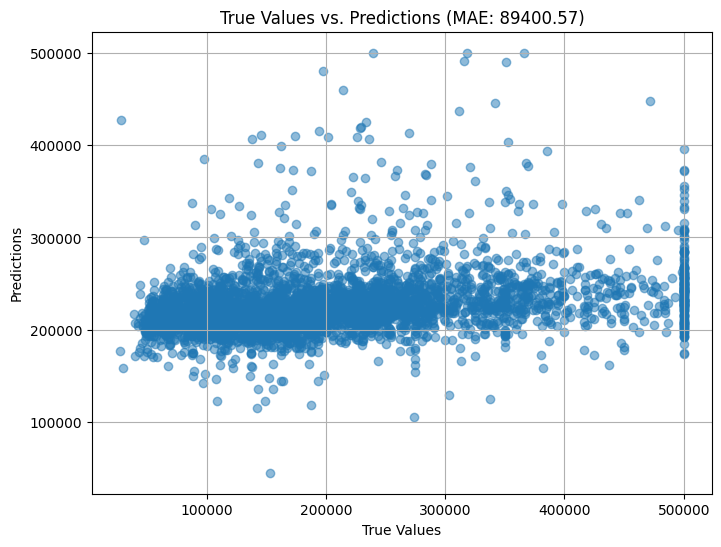

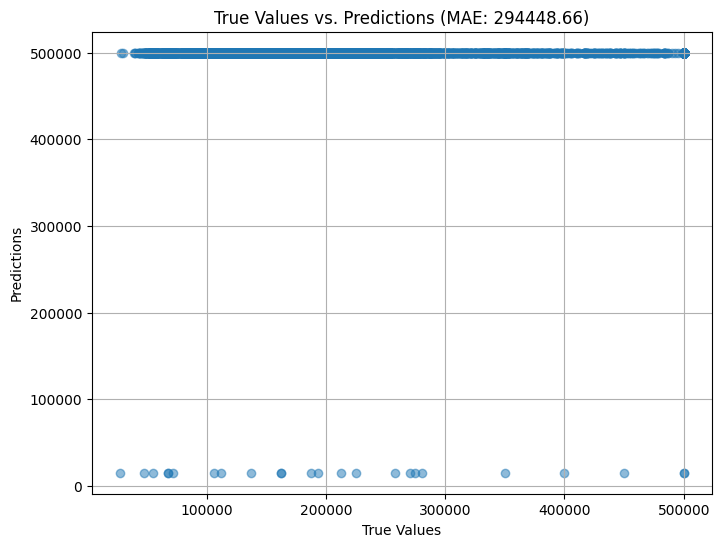

In [ ]:
from sklearn.linear_model import SGDRegressor

# stochastic gradient descent regression model
sgdReg = SGDRegressor(learning_rate='constant',eta0=0.00000001,random_state=id)
# plot results
mae = run_reg(sgdReg, Xtrain, Xtest, ytrain, ytest)

# quicker learning rate sgd model
sgdReg = SGDRegressor(learning_rate='constant',eta0=0.0001,random_state=id)
mae = run_reg(sgdReg, Xtrain, Xtest, ytrain, ytest)

Scale the features

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


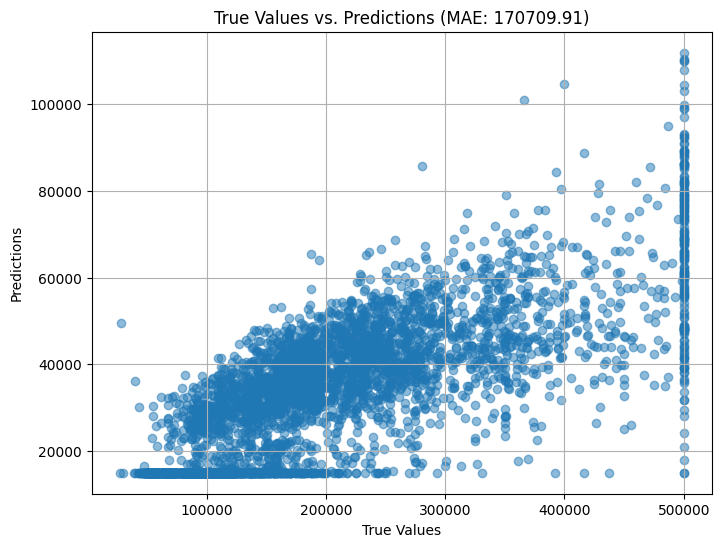

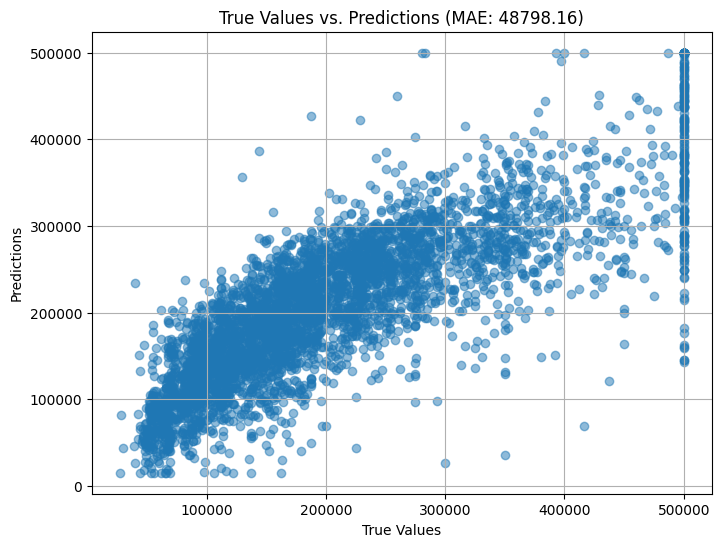

In [ ]:
# from Lab 5 instruction
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain_scaled=scaler.fit_transform(Xtrain)
Xtest_scaled=scaler.transform(Xtest)

# stochastic gradient descent regression model
sgdReg = SGDRegressor(learning_rate='constant',eta0=0.00000001,random_state=id)
# plot results
mae = run_reg(sgdReg, Xtrain_scaled, Xtest_scaled, ytrain, ytest)

# quicker learning rate sgd model
sgdReg = SGDRegressor(learning_rate='constant',eta0=0.0001,random_state=id)
mae = run_reg(sgdReg, Xtrain_scaled, Xtest_scaled, ytrain, ytest)

In the Graph 1 of the first plot, the model is underfitting because the
learning rate is too low. This is why the majority of the predicted data are between 200,000 and 300,000.

In Graph 2 of the first plot, the learning rate is too high so the algorithm diverges and the minimum of the cost function is never found so each prediction will have a massive error, this is why the model is only predicting 15,000 or 500,000

In the second plot, we can see that, after scaling the features, the model accuracy has improved. An ideal plot would be a straight line where the predicted value is equal to the true value (ie y=x).

In Graph 1 of the second plot, the MAE is still quite high at ~170,000 which means the model is underfitting. This is likely because the learning rate is too low.

In Graph 2 of the second plot, is much lower at ~48,000, and the general spread of the data is approaching the ideal y=x curve (with some noise, of course).

###Part B: Learning Curves

define run_training_curve

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor

# code from Lab 5 instructions
def run_training_curve(X_train,X_test,y_train,y_test,learning_rate=0.000000001,no_epoch=1000):
    # Don't change the random_state, this so that we more likely to have meaningful result
    sgd=SGDRegressor(random_state=id,verbose=0,learning_rate='constant',eta0=learning_rate)
    train_loss_list=[]
    test_loss_list=[]
    for epoch in range(no_epoch):
      # partial_fit = mini-batch learning
        sgd.partial_fit(X_train,y_train)
        y_pred_train=sgd.predict(X_train)
        y_pred_test=sgd.predict(X_test)
        train_loss_list.append(np.sqrt(np.mean((y_pred_train-y_train)**2)))
        test_loss_list.append(np.sqrt(np.mean((y_pred_test-y_test)**2)))
    plt.plot(train_loss_list,label=f'training Loss {np.min(train_loss_list[500:]):.6}')
    plt.plot(test_loss_list,label=f'test Loss {np.min(test_loss_list[500:]):.6}')
    plt.legend()
    plt.title(f"Train/Test loss curve for regressor with learning_rate={learning_rate}")
    plt.show()
    print("\n")

Create and plot various training curves

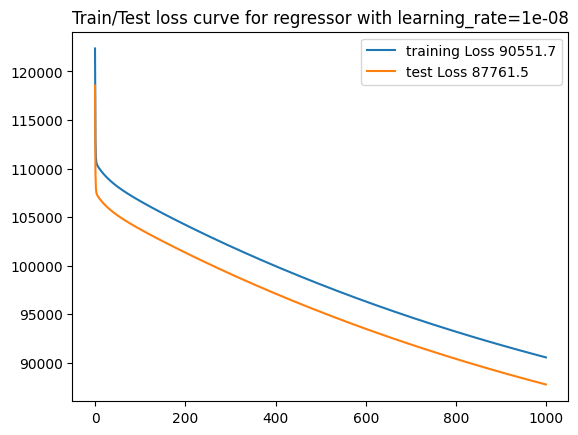

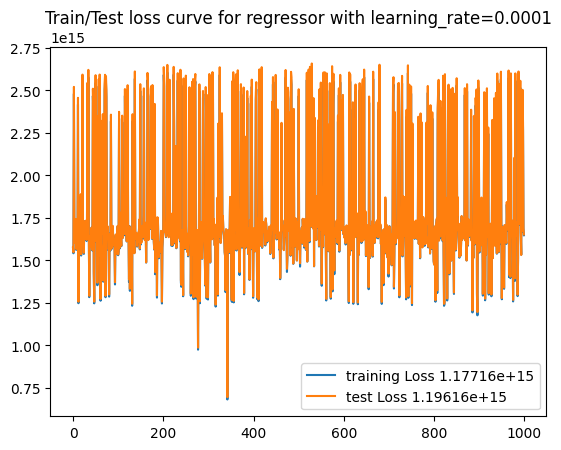

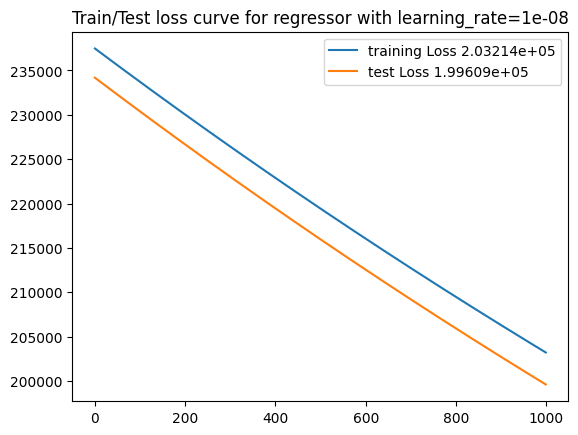

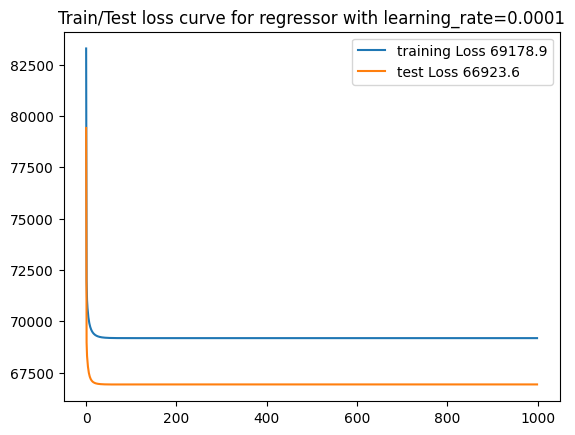

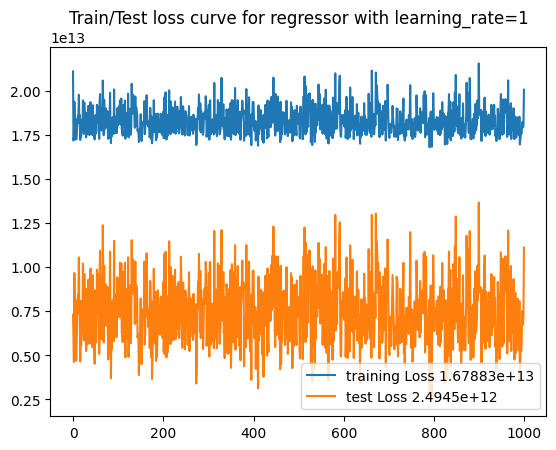

In [ ]:
# A - Unscaled data (X_train) with learning_rate=0.00000001
run_training_curve(Xtrain,Xtest,ytrain,ytest,learning_rate=0.00000001,no_epoch=1000)

# B - Unscaled data (X_train) with learning_rate=0.0001
run_training_curve(Xtrain,Xtest,ytrain,ytest,learning_rate=0.0001,no_epoch=1000)

# C - Scaled data (X_train_scaled) with learning_rate=0.00000001
run_training_curve(Xtrain_scaled,Xtest_scaled,ytrain,ytest,learning_rate=0.00000001,no_epoch=1000)

# D - Scaled data (X_train_scaled) with learning_rate=0.0001
run_training_curve(Xtrain_scaled,Xtest_scaled,ytrain,ytest,learning_rate=0.0001,no_epoch=1000)

# E - Scaled data (X_train_scaled) with learning_rate=1
run_training_curve(Xtrain_scaled,Xtest_scaled,ytrain,ytest,learning_rate=1,no_epoch=1000)



The first thing that stands out to me is that in all but one graph, the training loss is higher than the testing loss. The only explanation that I can give is that perhaps the test set is 'easier' than the training set. Which effectively means test set contains less outliers/noisey examples so predicting is easier.

**What do you think is going on with b and e?**

*Graphs B and E* are showing that the gradient descent algorithm is not working because the step size is too large, meaning the algorithm is diverging/oscillating. In both graphs, the training and test losses oscillate around constant values; there is no relationship between number of epochs and model accuracy.

**Why is the training + test loss jumping around and not converging?**

Since the step size is too large, the gradient descent algorithm is likely overshooting minimum point and jumping back and forth. If you imagine the cost function surface to be a valley, the step size is too large meaning each jump will land you on the other side of the valley, not the valley floor (local or global minimum). It shows why using the scaled features is essential because the learning rate 0.0001 caused the model with unscaled feature data to diverge/oscillate why the model using scale features stabilised at lower test and train loss.

**What do you think is going on with a? Do you think we will eventually converge to a better solution if we increase the number of training steps (epochs) (say.. no_epoch=5000?)?**

*Graph A* shows a fairly ideal train/test loss curve in that the training and test losses are decreasing after each epoch, though it is still unexpected that test loss is lower than training loss. It is definitely possible that the model will improve with more epochs. A quicker solution would be to increase the learning rate, this way you wouldn't need to increase the number of epochs.

**What about c)? Do you think we could increase the training steps / learning rate to get to a better solution?**

It is definitely possible that increasing the epochs or learning rate would improve the model's performance. *Graph C* shows that the model has very large losses for the test and training sets, likely because the slow learning rate means the model is underfitting the data in both cases. *Graph D* shows a case of a very good learning rate, where the test and train losses stabilise within the first 1000 epochs.

###Part C: Simple neural networks (MLP)

load dataset

In [ ]:
# import MNIST dataset
from tensorflow.keras.datasets import mnist

# load data
(X_trainval,y_trainval),(X_test,y_test) = mnist.load_data()

# split into 75/25 train/test split, stratifying y
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=id, stratify=y_trainval)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# normalise training data
X_train=X_train/255
X_val=X_val/255
X_test=X_test/255

(45000, 28, 28) (15000, 28, 28) (45000,) (15000,)


create model

In [ ]:
# https://www.geeksforgeeks.org/deep-learning/keras-sequential-class/#creating-a-simple-neural-network-using-sequential

import tensorflow as tf
from tensorflow import keras

# define model
model=keras.models.Sequential()

# add layers, per Lab 5 instructions
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer='ADAM',metrics=['accuracy'])

# view model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,860 (175.23 KB)

 Trainable params: 44,860 (175.23 KB)

 Non-trainable params: 0 (0.00 B)

Train + evaluate model

Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8242 - loss: 0.5787 - val_accuracy: 0.9477 - val_loss: 0.1759
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1559 - val_accuracy: 0.9615 - val_loss: 0.1320
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9640 - loss: 0.1156 - val_accuracy: 0.9620 - val_loss: 0.1244
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0885 - val_accuracy: 0.9667 - val_loss: 0.1126
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9764 - loss: 0.0761 - val_accuracy: 0.9649 - val_loss: 0.1163
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9812 - loss: 0.0631 - val_accuracy: 0.9700 - val_loss: 0.1081
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0529 - val_accuracy: 0.9698 - val_loss: 0.1123
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9841 - loss: 0.0486 - 

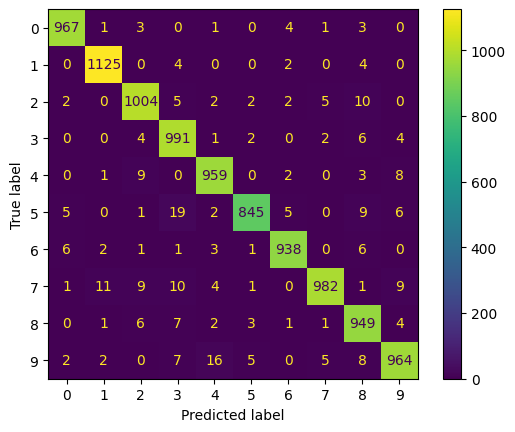

In [ ]:
# https://www.w3schools.com/python/python_ml_confusion_matrix.asp
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# fit model to
model.fit(X_train,y_train,epochs=30,validation_data=(X_val,y_val))

# evaluate model
model.evaluate(X_test,y_test)

# make predictions
predictions = model.predict(X_test)

# create confusion matrix
# the mnist dataset contains 28x28 greyscale images of handrawn digits 0-9
# the neural network outputs an array of length 10
# each number represents a probability that predicts the digit in the grey scale image
#    [0,    1,    2,    3,    4,    5,    6,    7,    8,    9]  <- the class labels
#    [0,    0.9   0,    0,    0,    0,    0,    0.3,  0,    0]  <- output of neural network
# we want the highest probability, so use np.argmax choosing axis as
cm = metrics.confusion_matrix(y_test, predictions.argmax(axis=1))

# display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

cm_display.plot()
plt.show()

The confusion matrix gives us information about the number of times each digit was predicted by the model. The hue of each cell indicates the number of occurrences

*   The x-avis is the predicted label
*   The y-axis is the true label
*   The sum of values in a row (ie sum of cells with the same true value) will give us the total number of times that a particular digit appeared in the test set.
*   The sum of values in a column (ie sum of cells with the same predicted value) gives us the total number of times the model predicted a certain digit.


*   The diagonal line running from the top left cell to the bottom right cell covers the examples where the model's prediction matched the actual value.
*   Cells that are not included in this diagonal are incorrect predictions.
*   Using the confusion matrix, the model produced the most true positive prediction for the digit '1', and the least true positive predictions for the digit '5'.
______________________________________________________________________________

The validation accuracy begins at 0.9477 in epoch 1, and steadily climbs to 0.9700 at epoch 6. After epoch 6, the validation accuracy remains between approximately between 0.966 and 0.974. The validation accuracy at epoch 30 is 0.9714.

Validation loss begins at 0.1759 at epoch 1, reaches a minimum of 0.1081 at epoch 6, then increases (with some variation) up to a value of 0.1724 at epoch 30.

*   Max val_accuracy: 0.9740 (epoch 21)
*   Min val_accuracy: 0.9477 (epoch 1)
*   Max val_loss: 0.2098 (epoch 28)
*   Min val_loss: 0.1081 (epoch 6)


*   Max acurracy: 0.9963 (epoch 22)
*   Min accuracy: 0.8242 (epoch 1)
*   Max loss: 0.5787 (epoch 1)
*   Min loss: 0.0110 (epoch 22)

###Part D: Transfer learning

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# using CIFAR100 dataset
(X_trainval, y_trainval), (X_test, y_test) = keras.datasets.cifar100.load_data()

# split into 80/20 train/test split, stratifying y
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.20, random_state=id, stratify=y_trainval
)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

# scale features
X_train = (X_train.astype("float32") / 255.0)
X_val   = (X_val.astype("float32")   / 255.0)
X_test  = (X_test.astype("float32")  / 255.0)

# select small model <40 million parameters from https://keras.io/api/applications/
# ResNet50V2, has ~25.6 million parameters
# define model
base_model = resnet_v2.ResNet50V2(include_top=False, weights="imagenet", pooling="avg")
pretrained_model = keras.models.clone_model(base_model)
pretrained_model.set_weights(base_model.get_weights())
for layer in pretrained_model.layers:
    layer.trainable = False  # freeze backbone

no_classes = 100
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Resizing(224, 224)(inputs) # upsize to ImageNet resolution
# resnet50v2 expects values for -1 to 1 so have to resize
x = layers.Lambda(lambda t: t * 2.0 - 1.0)(x)
x = pretrained_model(x)                            # frozen backbone
outputs = keras.layers.Dense(no_classes, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# compile model (stage 1)
# default learning rate is 0.001
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000, 1) (10000, 1)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_3 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 2048)           │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │       204,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,769,700 (90.67 MB)

 Trainable params: 204,900 (800.39 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

train for 20 epochs, all sublayers frozen

In [ ]:
batch_size = 256
epochs_stage1 = 20
acc1, val_acc1, test_acc1 = [], [], []
for _ in range(epochs_stage1):
    h = model.fit(X_train, y_train,
                  validation_data=(X_val, y_val),
                  epochs=1, batch_size=batch_size, verbose=2)
    acc1.append(h.history["accuracy"][-1])
    val_acc1.append(h.history["val_accuracy"][-1])
    test_acc1.append(model.evaluate(X_test, y_test, verbose=0)[1])

157/157 - 123s - 780ms/step - accuracy: 0.5212 - loss: 1.8713 - val_accuracy: 0.6444 - val_loss: 1.2652
157/157 - 103s - 656ms/step - accuracy: 0.7022 - loss: 1.0360 - val_accuracy: 0.6729 - val_loss: 1.1341
157/157 - 123s - 786ms/step - accuracy: 0.7533 - loss: 0.8533 - val_accuracy: 0.6858 - val_loss: 1.0920
157/157 - 123s - 787ms/step - accuracy: 0.7862 - loss: 0.7332 - val_accuracy: 0.6914 - val_loss: 1.0716
157/157 - 124s - 788ms/step - accuracy: 0.8182 - loss: 0.6413 - val_accuracy: 0.6949 - val_loss: 1.0574
157/157 - 124s - 787ms/step - accuracy: 0.8417 - loss: 0.5704 - val_accuracy: 0.6967 - val_loss: 1.0607
157/157 - 123s - 786ms/step - accuracy: 0.8602 - loss: 0.5132 - val_accuracy: 0.6961 - val_loss: 1.0601
157/157 - 124s - 787ms/step - accuracy: 0.8773 - loss: 0.4637 - val_accuracy: 0.7007 - val_loss: 1.0635
157/157 - 123s - 786ms/step - accuracy: 0.8913 - loss: 0.4212 - val_accuracy: 0.6988 - val_loss: 1.0722
157/157 - 124s - 787ms/step - accuracy: 0.9053 - loss: 0.3841 - 

Ran out of GPU usage